In [126]:
import numpy as np
import pandas as pd
%precision 3
#정시입학자 기준 코딩
df_att = pd.read_csv("출결(1,2,3학년 합산).csv")
df_page = pd.read_csv("생기부 페이지 수.csv")
df_class = pd.read_csv("학기별 평균등급.csv")
total_compatibility =0

In [127]:
page = np.array(df_page['생기부 페이지 수'])
page_df =pd.DataFrame({'page':page}, index=pd.Index(['A','B','C','D'], name='student'))
page_df

,page
student,
A,16
B,14
C,18
D,17


In [128]:
# 정시입학자들의 평균 생기부 페이지 수 
page_mean = page_df.mean()
# 페이지의 분산 & 표준편차
page_var = page_df.var()
page_std = page_df.std()

page_result_df = pd.concat([
    page_mean.to_frame().T.rename(index={0: 'page_mean'}),
    page_var.to_frame().T.rename(index={0: 'page_var'}),
    page_std.to_frame().T.rename(index={0: 'page_std'}),
])
page_result_df

,page
page_mean,16.250000
page_var,2.916667
page_std,1.707825


In [129]:
new_student_page = [19]
new_student_pages_series = pd.Series(new_student_page, index=page_df.columns)

In [130]:
k = 0.3  # 분산 보정 상수
recommended_page = page_mean - k * page_var

# 학생 점수 비교
Page_comparison = pd.DataFrame({
    'Recommended Page': recommended_page,
    'Student Page Score': new_student_pages_series
})

# 학기별 적합 여부 점수화: 1 = 적합, -1 = 주의
Page_comparison['Suitability_Score'] = np.where(
    Page_comparison['Student Page Score'] <= Page_comparison['Recommended Page'],
    -1,
    1
)

# 총 적합 점수 계산
total_compatibility =Page_comparison['Suitability_Score'].sum()

Page_comparison, total_compatibility

(      Recommended Page  Student Page Score  Suitability_Score
 page            15.375                  19                  1,
 np.int64(1))

In [131]:
Class = np.array(df_average[['1학년 1학기','1학년 2학기','2학년 1학기',
                   '2학년 2학기','3학년 1학기','3학년 2학기']])
Class_df =pd.DataFrame(Class,columns=['1-1','1-2','2-1','2-2','3-1','3-2',],
                         index=pd.Index(['A','B','C','D',], name='student'))
Class_df

,1-1,1-2,2-1,2-2,3-1,3-2
student,,,,,,
A,6.2,6.4,5.2,4.5,6.0,6.0
B,5.3,6.0,4.7,4.7,5.6,6.7
C,5.0,5.4,4.0,3.8,4.8,4.4
D,4.2,4.0,4.3,4.0,4.4,3.0


In [132]:
#각 학기별 전체 평균
class_mean = Class_df.mean()
#각 학생의 학기별 편차
deviation_df = Class_df - class_mean
#각 학기별 분산 & 표준편차
class_var = Class_df.var()
class_std = Class_df.std()

class_result_df = pd.concat([
    class_mean.to_frame().T.rename(index={0: 'class_mean'}),
    class_var.to_frame().T.rename(index={0: 'class_var'}),
    class_std.to_frame().T.rename(index={0: 'class_std'}),
])
class_result_df
#정시합격자들의 각 학기별 평균 수시 등급과 표준편차, 분산

,1-1,1-2,2-1,2-2,3-1,3-2
class_mean,5.175000,5.450000,4.550000,4.250000,5.200000,5.025000
class_var,0.682500,1.103333,0.270000,0.176667,0.533333,2.749167
class_std,0.826136,1.050397,0.519615,0.420317,0.730297,1.658061


In [133]:
# 새 학생 점수의 입력값
new_student_scores = [3, 4, 3, 3, 4, 3]
new_student_scoers_series = pd.Series(new_student_scores, index=Class_df.columns)
new_deviation = new_student_scoers_series - class_mean
result_df.loc['New_student'] = new_student_scores
result_df.loc['New_student_deviation'] = new_deviation
result_df

,1-1,1-2,2-1,2-2,3-1,3-2
class_mean,5.175000,5.450000,4.550000,4.250000,5.200000,5.025000
class_var,0.682500,1.103333,0.270000,0.176667,0.533333,2.749167
class_std,0.826136,1.050397,0.519615,0.420317,0.730297,1.658061
New_student,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000
New_student_deviation,-2.175000,-1.450000,-1.550000,-1.250000,-1.200000,-2.025000


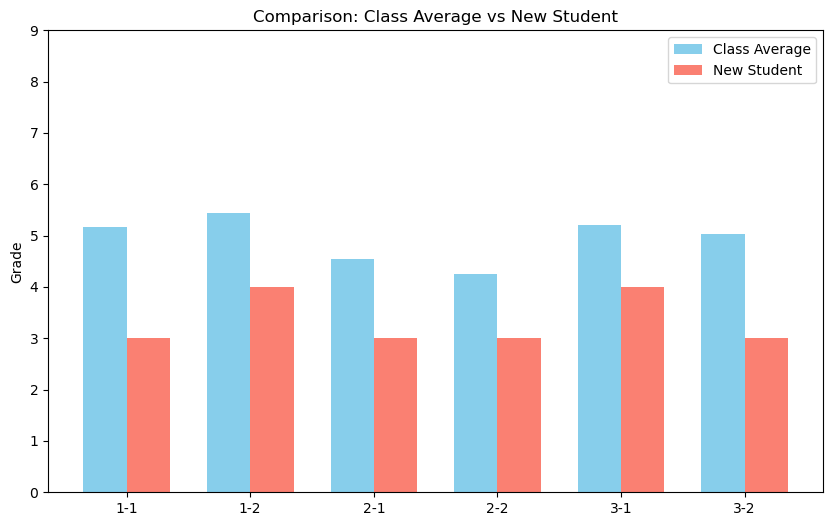

In [134]:
import matplotlib.pyplot as plt


# 막대 그래프 비교
plt.figure(figsize=(10,6))
width = 0.35  # 막대 너비

x = np.arange(len(Class_df.columns))  # 학기 인덱스

plt.bar(x - width/2, class_mean, width, label='Class Average', color='skyblue')
plt.bar(x + width/2, new_student_scoers_series, width, label='New Student', color='salmon')

plt.xticks(x, Class_df.columns)  # x축 학기 이름
plt.ylabel('Grade')
plt.title('Comparison: Class Average vs New Student')
plt.legend()
plt.ylim(0,9)  # 등급이 1~9 범위라고 가정
plt.show()

In [135]:
#분산 값의 크기에 따라 정시로 입학한 학생들의 평균 수시등급의 정확도가 달라지기에 
#분산 값에 따라 적절한 지원 등급을 점수로 환산해서 추천

#분산 기반 추천 점수
k = 0.3  # 분산 보정 상수
recommended_score = class_mean - k * class_var

#비교: 학생 점수 vs 추천 점수
comparison = pd.DataFrame({
    'Recommended Class Score': recommended_score,
    'Student Class Score': new_student_scoers_series
})

#적합 여부 판단 
comparison['Suitability_Score'] = np.where(
    new_student_series <= recommended_score,
    1,     # 학생 점수가 추천점수 이하 → 수시에 적합
    -1      # 학생 점수가 추천점수보다 높으면 → 수시에 주의
)
total_compatibility += comparison['Suitability_Score'].sum()

comparison, total_compatibility

(     Recommended Class Score  Student Class Score  Suitability_Score
 1-1                  4.97025                    3                  1
 1-2                  5.11900                    4                  1
 2-1                  4.46900                    3                  1
 2-2                  4.19700                    3                  1
 3-1                  5.04000                    4                  1
 3-2                  4.20025                    3                  1,
 np.int64(7))

In [139]:
#total_compatibility의 최댓값이 7이기에 3등분 해서 각 구간별로 적합성 판단
if total_compatibility >= 6:
    print("수시추천") 
elif total_compatibility >= 4:
    print("주의")
else:
    print("정시추천")

수시추천
